In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weather_classification_data.csv to weather_classification_data.csv


In [ ]:
df_train = pd.read_csv('weather_classification_data.csv')
df_test = pd.read_csv('weather_classification_data.csv')

In [ ]:
df_train.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
df_test.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
print(df_train['Cloud Cover'].unique())
print(df_train['Season'].unique())
print(df_train['Location'].unique())
print(df_train['Weather Type'].unique())

['partly cloudy' 'clear' 'overcast' 'cloudy']
['Winter' 'Spring' 'Summer' 'Autumn']
['inland' 'mountain' 'coastal']
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [ ]:
df_train.drop(columns=['Cloud Cover'], inplace=True)
df_test.drop(columns=['Cloud Cover'], inplace=True)


In [ ]:
replacements = {
    'Cloud Cover': {
        'clear': 0,
        'partly cloudy': 1,
        'overcast': 2
    },
    'Season': {
        'Winter': 0,
        'Spring': 1,
        'Summer': 2,
        'Autumn': 3  # Changed 'Fall' to 'Autumn'
    },
    'Location': {
        'inland': 0,
        'coastal': 1,
        'mountain': 2
    },
    'Weather Type': {
        'Sunny': 0,
        'Cloudy': 1,
        'Rainy': 2,
        'Stormy': 3,
        'Snowy': 4
    }
}

df_train = df_train.replace(replacements)
df_test = df_test.replace(replacements)

/tmp/ipython-input-2215595405.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace(replacements)
/tmp/ipython-input-2215595405.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.replace(replacements)


In [ ]:
df_train.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0
Weather Type,0


In [ ]:
df_test.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0
Weather Type,0


In [ ]:
df_train.columns


Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)',
       'Location', 'Weather Type'],
      dtype='object')

In [ ]:
df_train = df_train.dropna(subset=['Visibility (km)', 'Humidity'])
df_test = df_test.dropna(subset=['Visibility (km)', 'Humidity'])

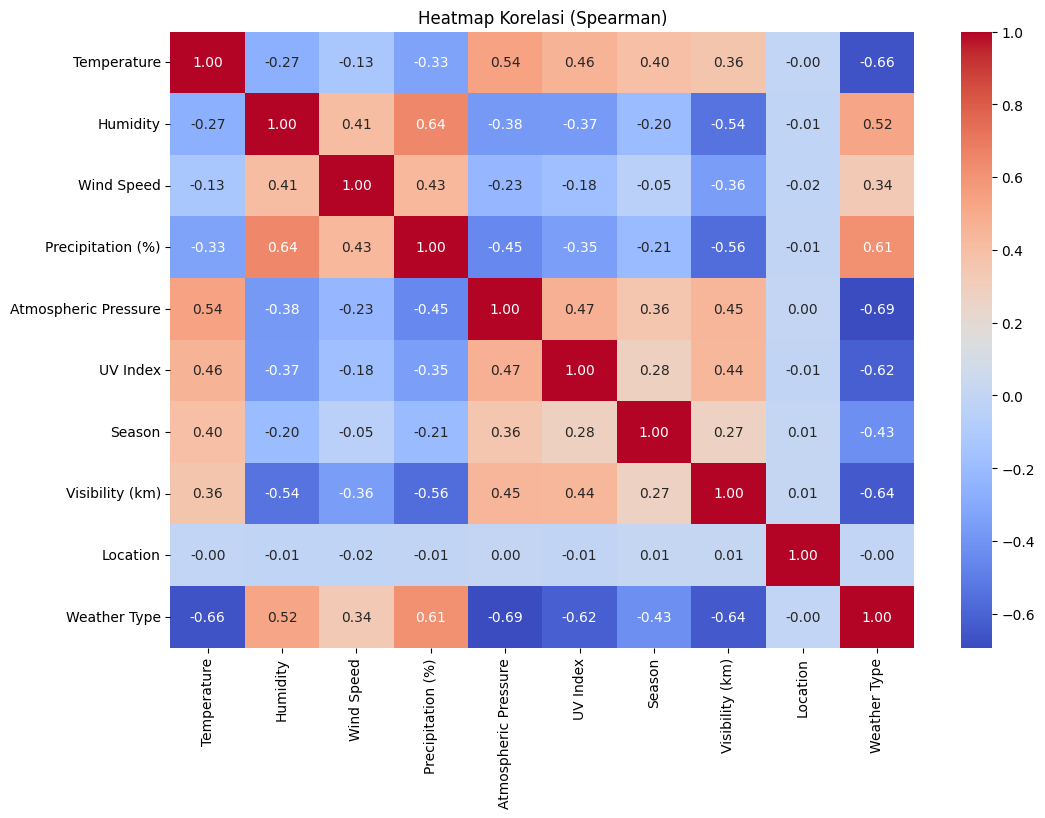

In [ ]:
df_numeric = df_train.select_dtypes(include=['int64', 'float64'])

correlation_matrix = df_numeric.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi (Spearman)")
plt.show()


,count
Season,
0,5610
1,2598
3,2500
2,2492


/tmp/ipython-input-2819859306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Season', data=df_train, palette='Set2')


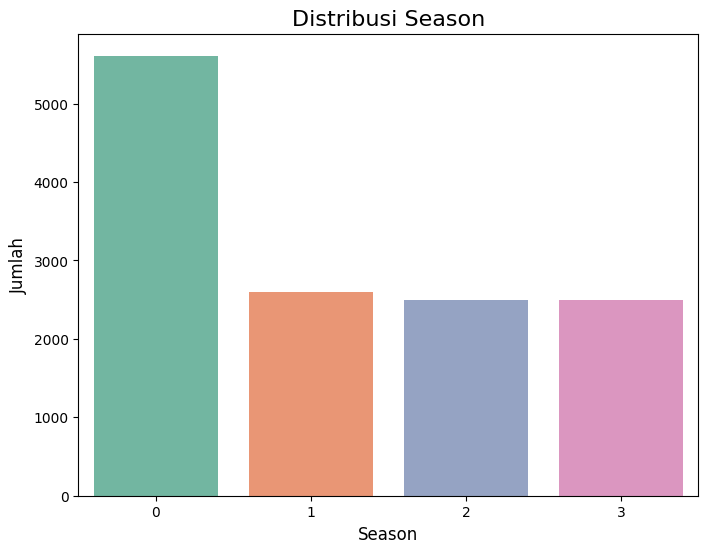

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Season', data=df_train, palette='Set2')

plt.title('Distribusi Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

plt.show()



In [ ]:
x_train = df_train.drop(columns=['Weather Type'])
y_train = df_train['Weather Type']

x_test = df_test.drop(columns=['Weather Type'])
y_test = df_test['Weather Type']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
y_train[:10]

array([2, 1, 0, 0, 2, 1, 3, 3, 3, 0])

In [ ]:
print(x_train[:5])

   Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0         14.0        73         9.5               82.0               1010.82   
1         39.0        96         8.5               71.0               1011.43   
2         30.0        64         7.0               16.0               1018.72   
3         38.0        83         1.5               82.0               1026.25   
4         27.0        74        17.0               66.0                990.67   

   UV Index  Season  Visibility (km)  Location  
0         2       0              3.5         0  
1         7       1             10.0         0  
2         5       1              5.5         2  
3         7       1              1.0         1  
4         1       0              2.5         2  


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13200, 9)
(13200, 9)
(13200,)
(13200,)


In [ ]:
# training model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = model.predict(x_test_scaled)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.25      1.00      0.40      3300
           1       0.00      0.00      0.00      3300
           2       0.00      0.00      0.00      3300
           3       0.00      0.00      0.00      3300

    accuracy                           0.25     13200
   macro avg       0.06      0.25      0.10     13200
weighted avg       0.06      0.25      0.10     13200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


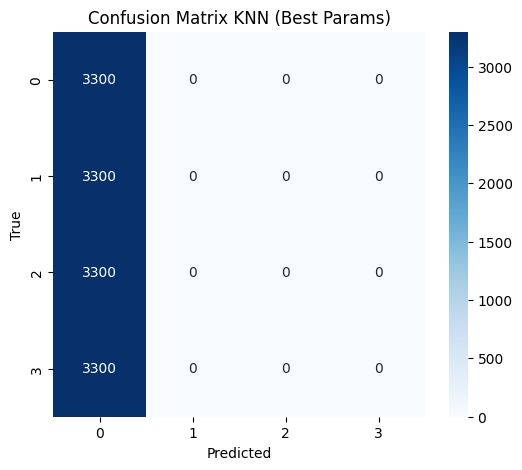

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix KNN (Best Params)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
model
x_train.shape
x_test.shape


(13200, 9)

In [ ]:
print("Before SMOTE:")
print(pd.Series(y_train).value_counts())

sm = SMOTE(random_state=42, k_neighbors=1)
x_train_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)

print("After SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Before SMOTE:
2    3300
1    3300
0    3300
3    3300
Name: count, dtype: int64
After SMOTE:
2    3300
1    3300
0    3300
3    3300
Name: count, dtype: int64


In [ ]:
model.fit(x_train_smote, y_train_smote)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    n_jobs=-1
)

grid.fit(x_train_smote, y_train_smote)

print("Best Params:", grid.best_params_)
print("Best Score (CV):", grid.best_score_)


Best Params: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}
Best Score (CV): 0.8871212121212121
